In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
iris.csv
pima-indians-diabetes.csv
sonar.csv


In [3]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Cek Missing Values
print(df.isnull().sum(), '\n')
print('Terdapat {} Missing Values dalam Dataset'.format(df.isnull().sum().sum()))

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 

Terdapat 0 Missing Values dalam Dataset


In [7]:
#Cek Statistical Insight
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


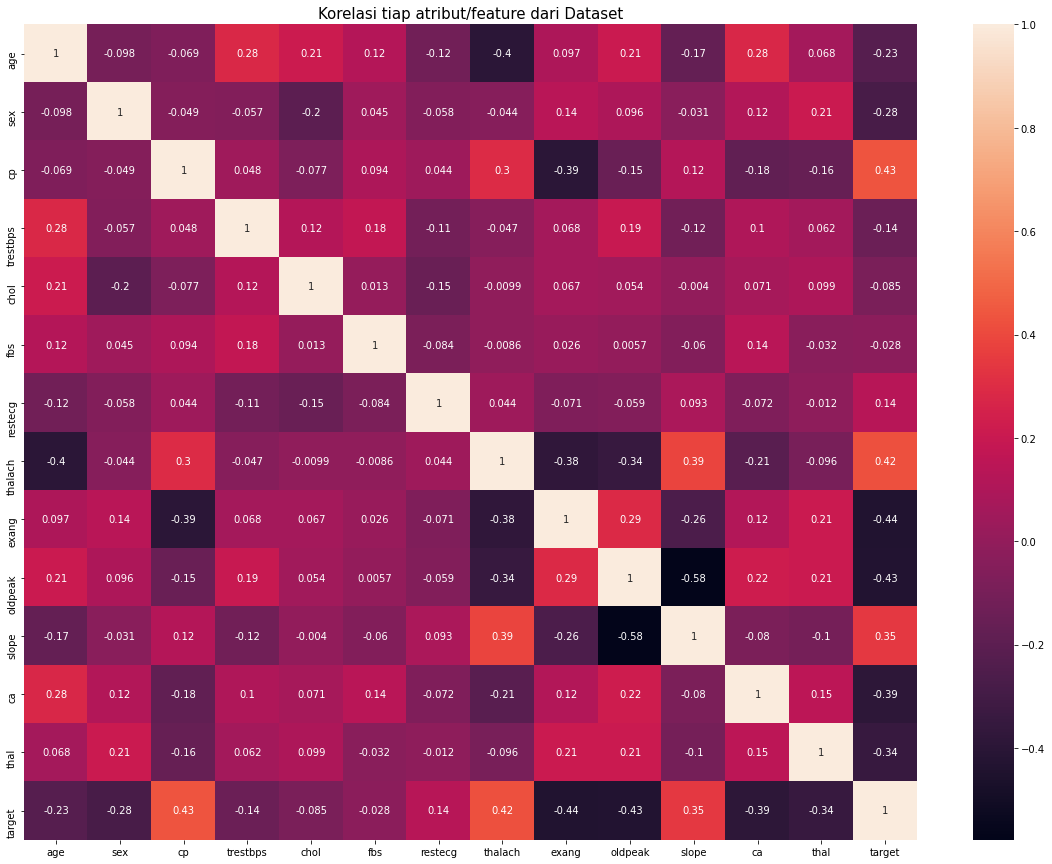

In [144]:
#Cek korelasinya
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)
plt.title('Korelasi tiap atribut/feature dari Dataset', fontsize=15)
plt.show()

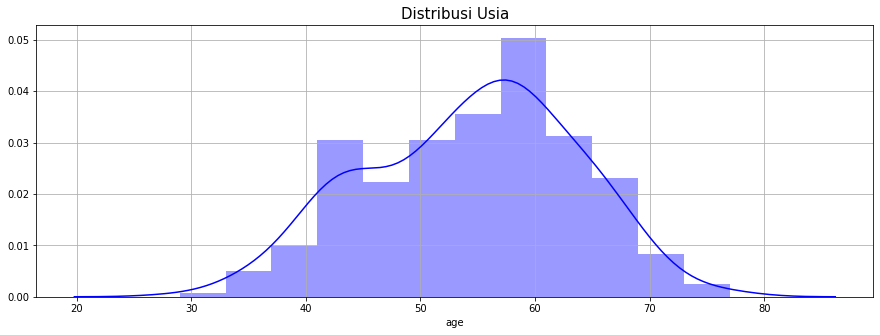

In [10]:
#Cek distribusi usia dari pasien
plt.figure(figsize=(15, 5))
sns.distplot(df['age'], color='blue')
plt.title('Distribusi Usia', fontsize=15)
plt.grid('on')
plt.show()

Dapat dilihat bahwa pasien yang cenderung mengidap penyakit jantung adalah pasien yang berusia 58-60.

In [11]:
kelamin = df['sex'].value_counts()
kelamin

1    207
0     96
Name: sex, dtype: int64

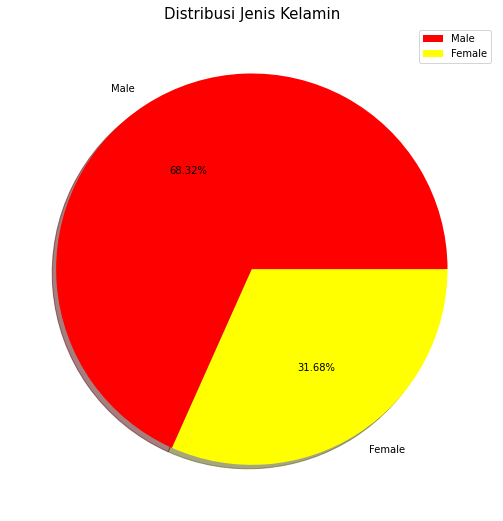

In [17]:
warna = plt.cm.autumn(np.linspace(0, 1, 2))
label = ['Male', 'Female']
explode = [0, 0]

plt.figure(figsize=(9, 9))
plt.pie(kelamin, colors = warna, labels = label, shadow=True, explode=explode, autopct='%.2f%%')
plt.title('Distribusi Jenis Kelamin', fontsize=15)
plt.legend()
plt.show()

Pada dataset terlihat bahwa laki-laki cenderung lebih banyak mengidap penyakit jantung

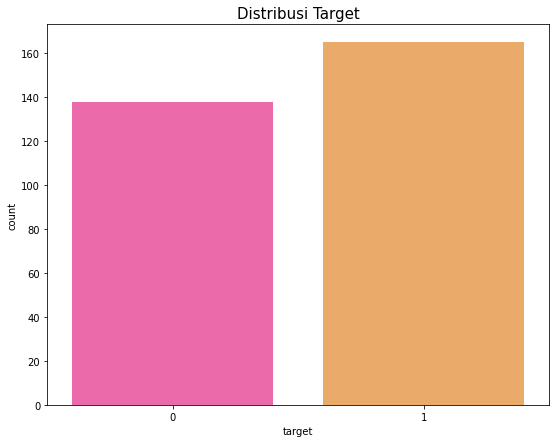

In [24]:
#Melihat persebaran dari target
plt.figure(figsize=(9, 7))
sns.countplot(df['target'], palette='spring')
plt.title('Distribusi Target', fontsize=15)
plt.show()

Target tersebar dengan cukup merata dimana jumlah pasien yang terserang penyakit jantung (1) jumlahnya tidak berbeda jauh dengan pasien yang tidak mengidap penyakit jantung (0)

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

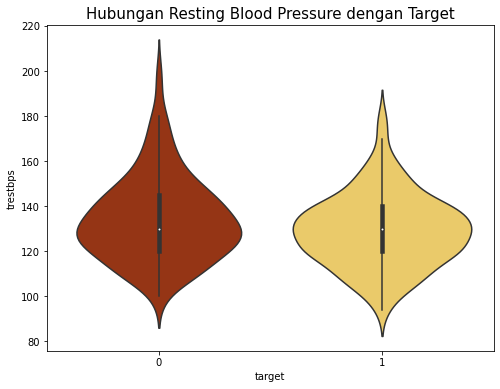

In [31]:
#Cek hubungan dari trestbps (resting blood pressure) dengan target
plt.figure(figsize=(8, 6))
sns.violinplot(df['target'], df['trestbps'], palette='afmhot')
plt.title('Hubungan Resting Blood Pressure dengan Target', fontsize=15)
plt.show()

Terlihat bahwa pasien yang tidak mengidap penyakit jantung cenderung memiliki resting blood pressure yang lebih tinggi dibanding dengan pasien yang mengidap penyakit jantung

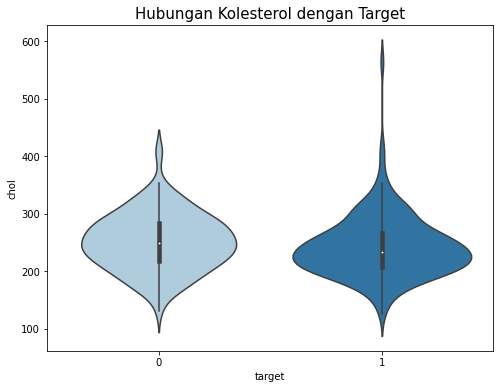

In [32]:
#Cek hubungan dari kolesterol dengan target
plt.figure(figsize=(8, 6))
sns.violinplot(df['target'], df['chol'], palette='Paired')
plt.title('Hubungan Kolesterol dengan Target', fontsize=15)
plt.show()

Terlihat bahwa pasien yang mengidap penyakit jantung cenderung memiliki kadar kolesterol yang lebih tinggi dibanding dengan pasien yang tidak mengidap penyakit jantung

In [35]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

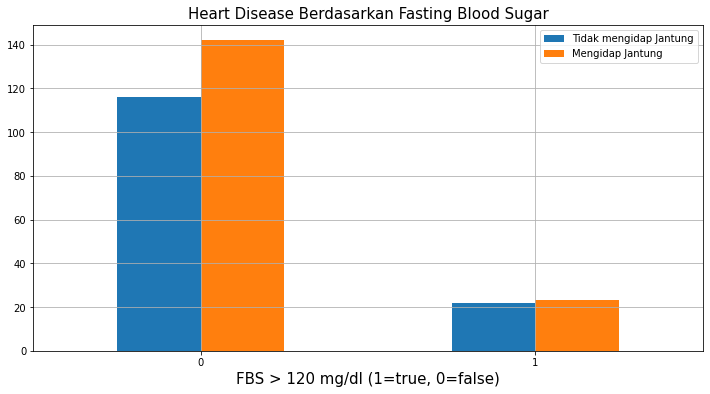

In [40]:
pd.crosstab(df['fbs'], df['target']).plot(kind='bar', figsize=(12, 6))
plt.title('Heart Disease Berdasarkan Fasting Blood Sugar', fontsize=15)
plt.xlabel('FBS > 120 mg/dl (1=true, 0=false)', fontsize=15)
plt.xticks(rotation=0)
plt.legend(['Tidak mengidap Jantung', 'Mengidap Jantung'])
plt.grid()
plt.show()

Mayoritas pasien baik yang mengidap maupun yang tidak mengidap penyakit jantung memiliki FBS dibawah 120 mg/dl yang artinya tidak mengidap diabetes, hanya sekitar 50-60 pasien saja yang mengidap diabetes

In [41]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

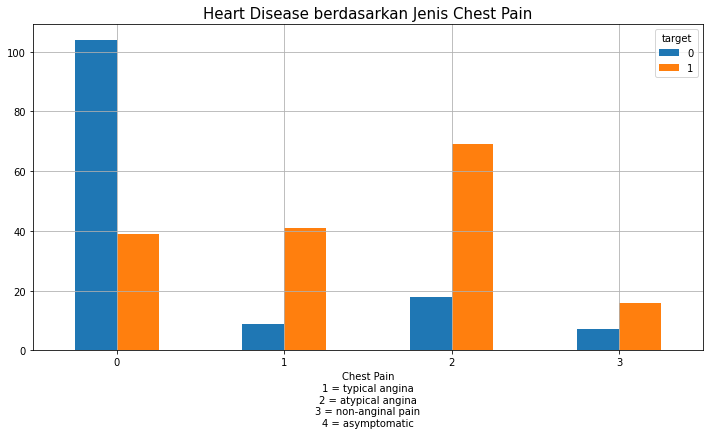

In [43]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(12, 6))
plt.title('Heart Disease berdasarkan Jenis Chest Pain', fontsize=15)
plt.xlabel('Chest Pain\n1 = typical angina\n2 = atypical angina\n3 = non-anginal pain\n4 = asymptomatic')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Pasien yang tidak mengidap penyakit jantung mayoritas memiliki penyakit dada dengan tipe 0 yaitu typical angina sementara pasien yang mengidap penyakit jantung mayoritas memiliki penyakit dada bertipe 2 atau non-anginal pain

**Machine Learning Model**

**Data Preprocessing**

In [49]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
scaler = StandardScaler()
scaler2 = PowerTransformer(method='Box-Cox', standardize=True)

In [51]:
X = df.drop(['target'], axis=1)
y = df['target']

In [53]:
X_scaled = scaler.fit_transform(X.values)
#y_scaled = scaler.fit(y.values)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5)
rf.fit(X_train, y_train)

prediksi_rf = rf.predict(X_train)

In [83]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [84]:
print(f1_score(y_train, prediksi_rf, average='macro'))
print(precision_score(y_train, prediksi_rf, average='macro'))
print(recall_score(y_train, prediksi_rf, average='macro'))

0.9453847889866848
0.9495798319327731
0.9428502448782506


In [85]:
prediksi_rf = rf.predict(X_test)

In [86]:
print('Akurasi Random Forest pada Testing Set adalah :', round(rf.score(X_test, y_test),2))
print(f1_score(y_test, prediksi_rf, average='macro'))
print(precision_score(y_test, prediksi_rf, average='macro'))
print(recall_score(y_test, prediksi_rf, average='macro'))

Akurasi Random Forest pada Testing Set adalah : 0.87
0.8679653679653679
0.8709150326797386
0.8669181034482758


In [102]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



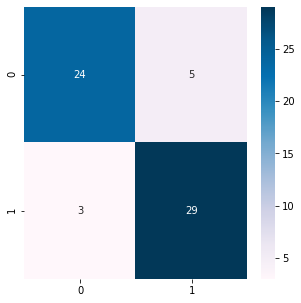

In [103]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.show()

Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
prediksi_lr = lr.predict(X_train)

In [94]:
print(f1_score(y_train, prediksi_lr, average='macro'))
print(precision_score(y_train, prediksi_lr, average='macro'))
print(recall_score(y_train, prediksi_lr, average='macro'))

0.8607230680688536
0.8674886621315192
0.8577291853486928


In [96]:
prediksi_lr = lr.predict(X_test)

In [97]:
print('Akurasi Logistic Regression pada Testing Set adalah :', round(lr.score(X_test, y_test),2))
print(f1_score(y_test, prediksi_lr, average='macro'))
print(precision_score(y_test, prediksi_lr, average='macro'))
print(recall_score(y_test, prediksi_lr, average='macro'))

Akurasi Logistic Regression pada Testing Set adalah : 0.85
0.8523002421307506
0.8521505376344086
0.8529094827586207


In [100]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



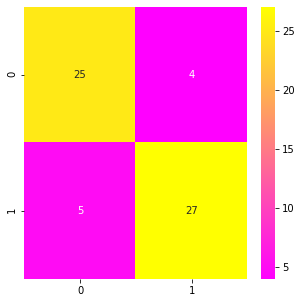

In [104]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='spring')
plt.show()

K-Nearest Neighbor

In [105]:
from sklearn.neighbors import KNeighborsClassifier

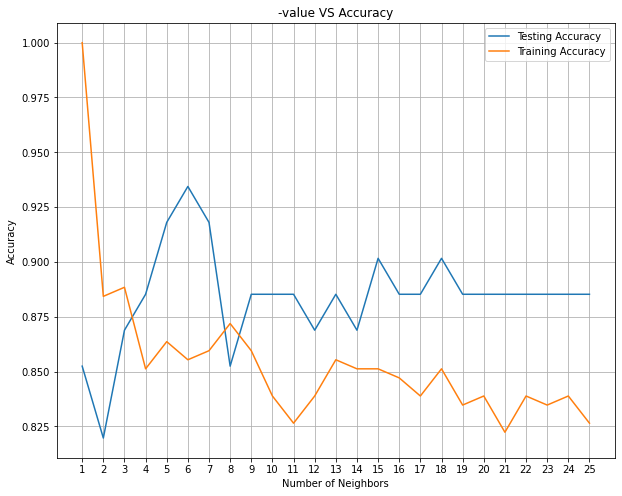


Nilai Akurasi terbaik untuk Model KNN adalah 0.9344262295081968 dengan nilai K = 6


In [111]:
neig = np.arange(1, 26)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[10,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Akurasi terbaik untuk Model KNN adalah {} dengan nilai K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

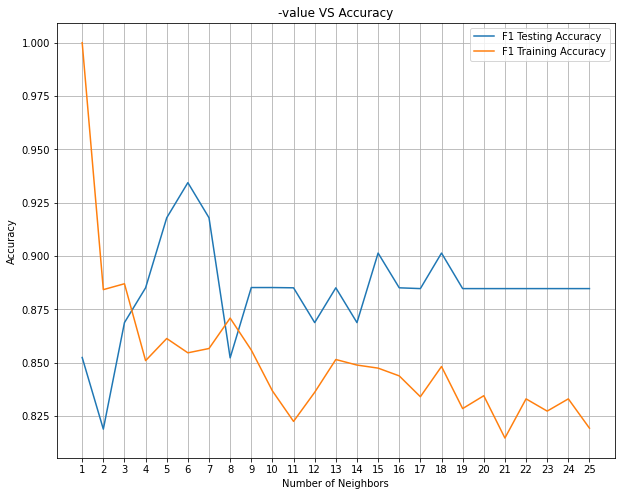


Nilai F1 Score terbaik untuk Model KNN adalah 0.9344086021505376 dengan nilai K = 6


In [117]:
neig = np.arange(1, 26)
f1_train_accuracy = []
f1_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  f1_train_accuracy.append(f1_score(y_train, prediksi_knn_train, average='macro'))
  f1_test_accuracy.append(f1_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, f1_test_accuracy, label = 'F1 Testing Accuracy')
plt.plot(neig, f1_train_accuracy, label = 'F1 Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai F1 Score terbaik untuk Model KNN adalah {} dengan nilai K = {}".format(np.max(f1_test_accuracy),1+f1_test_accuracy.index(np.max(f1_test_accuracy))))

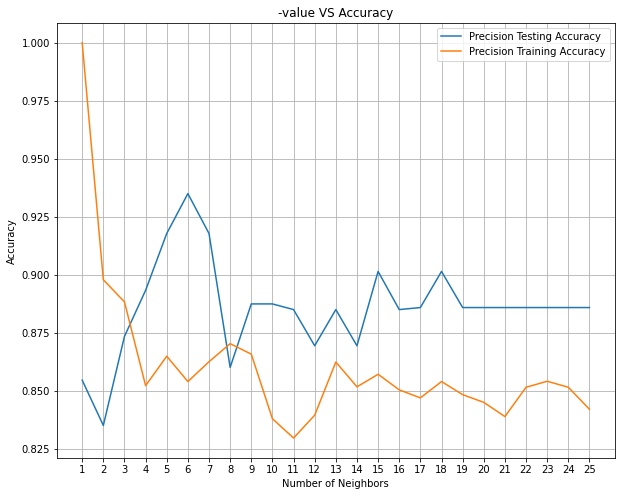


Nilai Precision terbaik untuk Model KNN adalah 0.9349462365591398 untuk nilai K = 6


In [118]:
neig = np.arange(1, 26)
precision_train_accuracy = []
precision_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  precision_train_accuracy.append(precision_score(y_train, prediksi_knn_train, average='macro'))
  precision_test_accuracy.append(precision_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, precision_test_accuracy, label = 'Precision Testing Accuracy')
plt.plot(neig, precision_train_accuracy, label = 'Precision Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Precision terbaik untuk Model KNN adalah {} untuk nilai K = {}".format(np.max(precision_test_accuracy),1+precision_test_accuracy.index(np.max(precision_test_accuracy))))

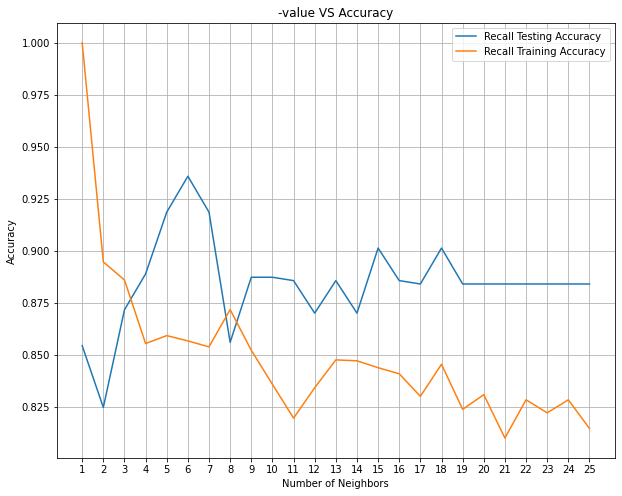


Nilai Recall Score terbaik untuk Model KNN adalah 0.9358836206896552 dengan K = 6


In [121]:
neig = np.arange(1, 26)
recall_train_accuracy = []
recall_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  recall_train_accuracy.append(recall_score(y_train, prediksi_knn_train, average='macro'))
  recall_test_accuracy.append(recall_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, recall_test_accuracy, label = 'Recall Testing Accuracy')
plt.plot(neig, recall_train_accuracy, label = 'Recall Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Recall Score terbaik untuk Model KNN adalah {} dengan K = {}".format(np.max(recall_test_accuracy),1+recall_test_accuracy.index(np.max(recall_test_accuracy))))

Support Vector Machine Classifiers

In [123]:
from sklearn.svm import SVC

In [134]:
svmc = SVC(kernel='poly')
svmc.fit(X_train, y_train)
prediksi_svm_train = svmc.predict(X_train)

In [135]:
print(f1_score(y_train, prediksi_svm_train, average='macro'))
print(precision_score(y_train, prediksi_svm_train, average='macro'))
print(recall_score(y_train, prediksi_svm_train, average='macro'))

0.9282512774900155
0.9360827664399093
0.9245016210250396


In [136]:
prediksi_svm_test = svmc.predict(X_test)

print('Accuracy of SVM with Polynomial Kernel on test set: {:.2f}'.format(svmc.score(X_test, y_test)))
print('F1 Score Test Data   :', f1_score(y_test, prediksi_svm_test, average='macro'))
print('Precision Test Data  :', precision_score(y_test, prediksi_svm_test, average='macro'))
print('Recall Test Data     :', recall_score(y_test, prediksi_svm_test, average='macro'))

Accuracy of SVM with Polynomial Kernel on test set: 0.90
F1 Score Test Data   : 0.9016129032258065
Precision Test Data  : 0.9021505376344086
Recall Test Data     : 0.9030172413793103


In [139]:
y_pred_svmc = svmc.predict(X_test)
print(classification_report(y_test, y_pred_svmc))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



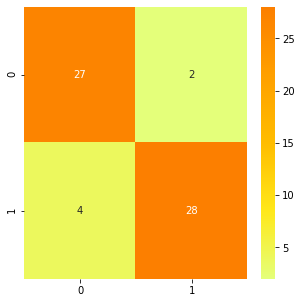

In [140]:
cm = confusion_matrix(y_test, y_pred_svmc)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.show()